Compare the results of the different ways of computing cosine distances for venues of different fields. `venue_distances.py` has already averaged the results per venue.

The plots can be improved by showing them as stars, as I did with the Marketing personas in FarmNet.

In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
dists = {f: json.load(open(f'../data/distances/{f}/venue_avgs_l0.json')) for f in ['avg', 'concat', 'sum']}
subjects = json.load(open('../data/openalex/subjects.json'))
fields = {id: data['name'] for id, data in subjects.items() if data['level'] == 0}
field_venues = json.load(open('../data/openalex/field_venue_cnt.json'))

We will start with some examples. We will compare the results of the three methods for some venues.

In [3]:
def plot_distances(venue):
  """ Plot the distances. """
  plt.figure(figsize=(15, 4))
  x = np.arange(0, 19*3, 3)
  width = .75
  plt.bar(x-1, dists['avg'][venue].values(), width, label='Avg.')
  plt.bar(x-.25, dists['concat'][venue].values(), width, label='Concat.')
  plt.bar(x+.5, dists['sum'][venue].values(), width, label='Sum')
  plt.xticks(x-.25, list(fields.values()), rotation=45)
  plt.xlabel('No. of tokens')
  plt.ylabel('No. of venues (log. scale)')
  plt.legend()
  plt.show()

In [4]:
def top(venue, n=3):
  """ Return the n fields with the smallest distance to the given venue. """
  top = {}
  for cos_type in dists.keys():
    venue_dists = dists[cos_type][venue]
    ordered = dict(sorted(venue_dists.items(), key=lambda t: t[1]))
    best = dict(islice(ordered.items(), n))
    top[cos_type] = {fields[field_id]: dist for field_id, dist in best.items()}
  return top

In [5]:
def display(venue):
  """ Plot the distances, print info and top distances. """
  belongs = None
  for field in field_venues:
    if venue in field_venues[field]:
      print(f'{venue} belongs to the field {field}.')
      belongs = field
  print(f'{venue} is assigned to {field_venues[belongs][venue]} docs. ')
  top_fields = top(venue)
  print(top_fields)
  plot_distances(venue)

Müller, Klaus-Robert belongs to the field Computer science.
Müller, Klaus-Robert is assigned to 82 docs. 
{'avg': {'Computer science': 0.9167538998783775, 'Engineering': 0.9317758989485027, 'Materials science': 0.9329525812497774}, 'concat': {'Computer science': 0.937345899124247, 'Mathematics': 0.9565209980952397, 'Materials science': 0.956857764229925}, 'sum': {'Computer science': 0.2817520985469705, 'Biology': 0.4539487910671631, 'Materials science': 0.49855571131641635}}


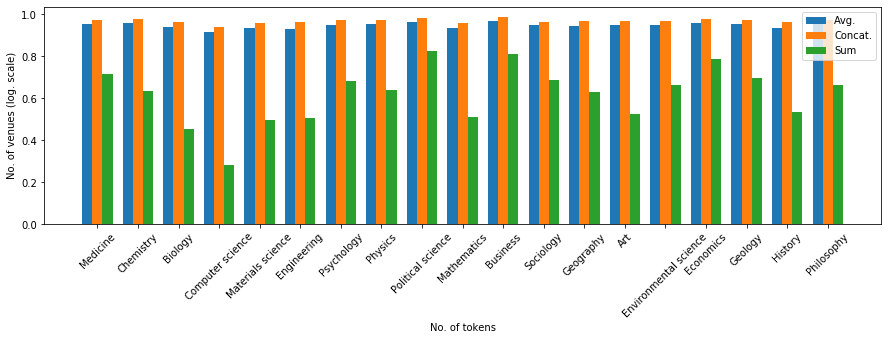

In [6]:
venue = "M\u00fcller, Klaus-Robert"
display(venue)

Frontiers in Plant Science belongs to the field Biology.
Frontiers in Plant Science is assigned to 30 docs. 
{'avg': {'Biology': 0.9521076091430802, 'Geology': 0.9636228496432981, 'Chemistry': 0.9658559946909543}, 'concat': {'Biology': 0.9741413603252738, 'Chemistry': 0.9788806027464285, 'Geology': 0.9800115686528368}, 'sum': {'Biology': 0.5454368488385634, 'Chemistry': 0.6300229015775595, 'Geology': 0.7692169034340935}}


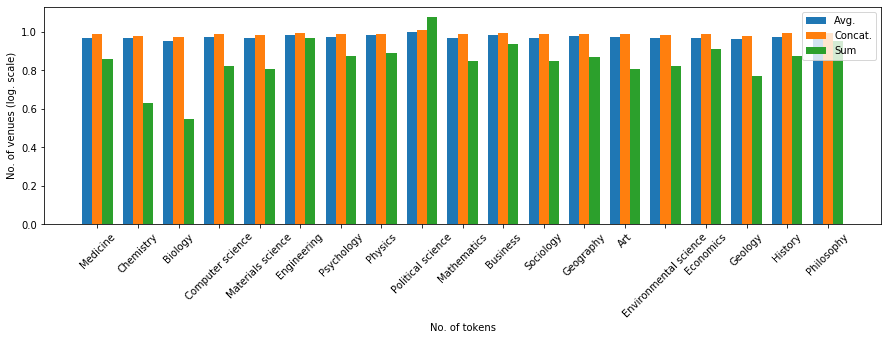

In [7]:
venue = "Frontiers in Plant Science"
display(venue)

Journal of Clinical Medicine belongs to the field Medicine.
Journal of Clinical Medicine is assigned to 40 docs. 
{'avg': {'Medicine': 0.9461826830837413, 'Biology': 0.9648331673625892, 'History': 0.9666340103141428}, 'concat': {'Medicine': 0.961079490772845, 'Biology': 0.9806909449652332, 'Psychology': 0.9826410172521548}, 'sum': {'Medicine': 0.5495988330977047, 'Biology': 0.7390584819237477, 'Mathematics': 0.819046266914113}}


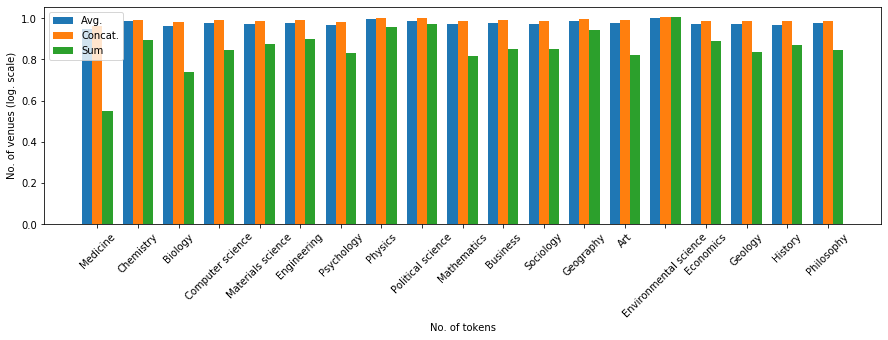

In [8]:
venue = "Journal of Clinical Medicine"
display(venue)

New Journal of Physics belongs to the field Physics.
New Journal of Physics is assigned to 42 docs. 
{'avg': {'Chemistry': 0.954309416446247, 'Geology': 0.9561547898313585, 'Computer science': 0.9627774741760411}, 'concat': {'Geology': 0.9675532295478403, 'Chemistry': 0.9761117003202351, 'Computer science': 0.9771914631146075}, 'sum': {'Chemistry': 0.6610145548306057, 'Mathematics': 0.7149905130115424, 'Biology': 0.7256607971129677}}


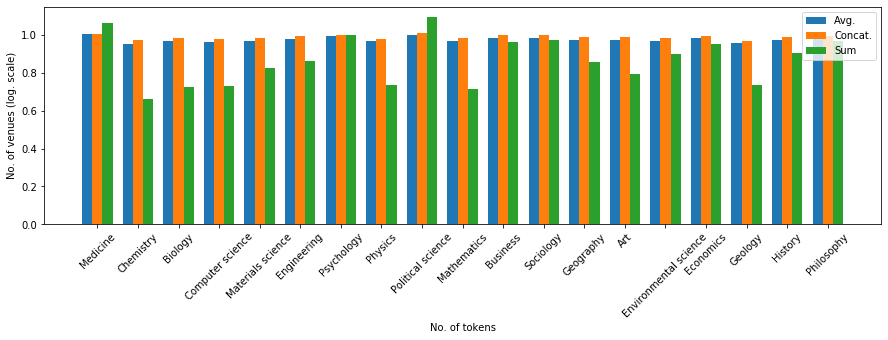

In [9]:
venue = "New Journal of Physics"
display(venue)

Journal of Materials Science belongs to the field Materials science.
Journal of Materials Science is assigned to 3 docs. 
{'avg': {'Chemistry': 0.9443042277809018, 'Biology': 0.9573372104600694, 'Geology': 0.9591844606780064}, 'concat': {'Chemistry': 0.9659714121196172, 'Materials science': 0.9777472936672099, 'Biology': 0.9826346458854044}, 'sum': {'Chemistry': 0.5593843563092362, 'Geology': 0.7203333226159575, 'Biology': 0.7665051030620506}}


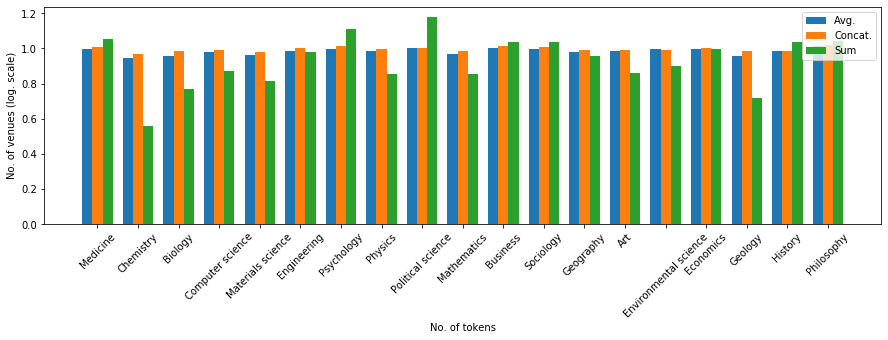

In [10]:
venue = "Journal of Materials Science"
display(venue)

Frontiers in Psychology belongs to the field Psychology.
Frontiers in Psychology is assigned to 120 docs. 
{'avg': {'Sociology': 0.9299385884464711, 'Psychology': 0.9299978396989844, 'History': 0.9302196044179571}, 'concat': {'Sociology': 0.9478621650056172, 'History': 0.9535477775278127, 'Psychology': 0.9546038887792972}, 'sum': {'Art': 0.4221040225798911, 'History': 0.4330888142932817, 'Psychology': 0.4331129075786848}}


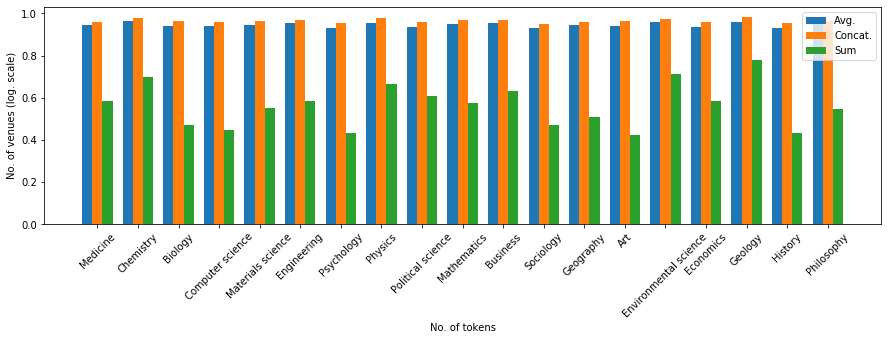

In [11]:
venue = "Frontiers in Psychology"
display(venue)

Burda, Michael belongs to the field Economics.
Burda, Michael is assigned to 10 docs. 
{'avg': {'Political science': 0.9132891392695998, 'Economics': 0.9187857852444171, 'Business': 0.9332011037877711}, 'concat': {'Economics': 0.9257073008045904, 'Political science': 0.9303116799358959, 'Business': 0.9366140026824745}, 'sum': {'Economics': 0.2498728566170576, 'Business': 0.38489241931680185, 'Political science': 0.4953472906491708}}


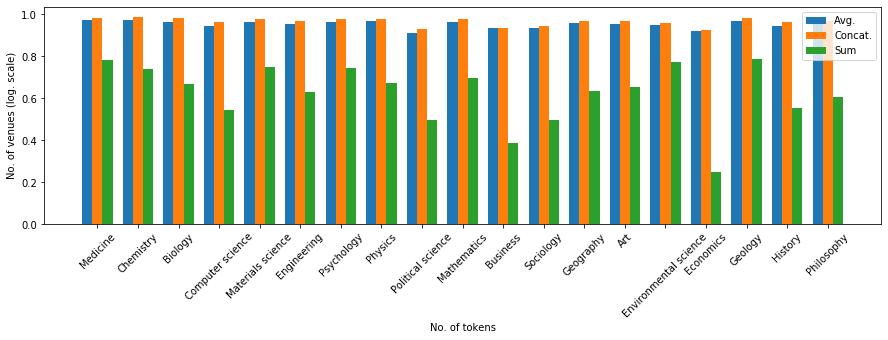

In [12]:
venue = "Burda, Michael"
display(venue)

Berlin Studies of the Ancient World belongs to the field History.
Berlin Studies of the Ancient World belongs to the field Philosophy.
Berlin Studies of the Ancient World is assigned to 41 docs. 
{'avg': {'Political science': 0.9070231398830753, 'Economics': 0.9154622102331997, 'Sociology': 0.919143423777033}, 'concat': {'Political science': 0.9409092790830597, 'Sociology': 0.9432082842566926, 'Economics': 0.947027095006558}, 'sum': {'History': 0.3100667874904517, 'Geography': 0.326983777304804, 'Philosophy': 0.3421915629285346}}


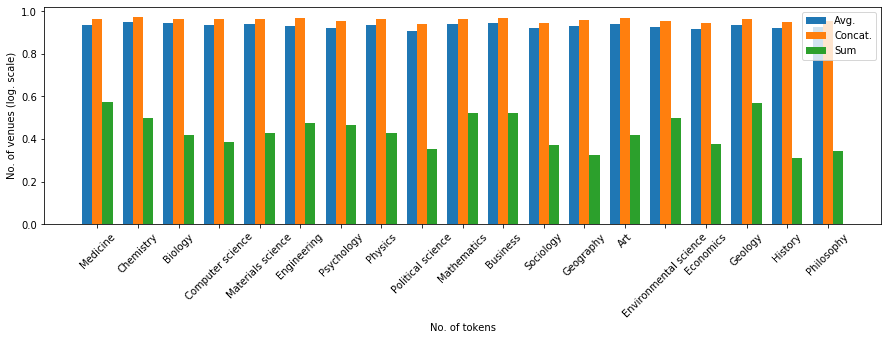

In [13]:
venue = "Berlin Studies of the Ancient World"
display(venue)

Müller appears 82 times as a referee of a thesis. All three methods were able to identify that he is a computer scientist. Sum was the only method to identify his work in the field of biology. Concat assigns him math in second place, which is also appropriate given the theoretical nature of his work. Still, biology is more accurate. Avg assigns engineering in second place, which, although reasonable due to software engineering projects he is involved in, is not as appropriate as either Biology or Math. Coincidentally, all three methods assign Prof. Müller Materials Science in third place.

Frontiers in Plant Science is a journal that belongs to the field of Biology. It appears in 30 publications. Again, all three methods were able to identify this. They all also agree on Chemistry and Geology and second and third options, although they order them differently.

Same happens with the Journal of Clinical Medicine, which appears in 40 docs.

No method is able to identify that the New Journal of Physics belongs to the field Phsysics. Avg and Sum assign Chemistry to the journal, which, although it is the most related field, is not accurate. Concat assigns it Geology, which is worse.

The Journal of Materials Science only appears in 3 documents. No method assigned it to Materials Science as the most similar field. They all picked Chemistry, which is a related field. Concat was the only one to assign it in one of their three guesses.

"Frontiers in Psychology" appears in 120 documents. All three methods gave similar scores to Sociology, Psychology, History and Art.

Michael Burda is a professor of Economics, which has advised 10 theses. All three methods assigned it Political Science, Economics and Business as its most similar subjects. Sum ordered starting with Economics as the most similar and Political Science at the end, all three subjects considerably distanced from one another. Concat, on the other hand, has all three subjects between 0.92 and 0.93, which is a recurring theme in this analysis.

Berlin Studies of the Ancient World can be assigned to both History and Philosophy. It appears in 41 documents. Sum was the only method to correctly guess that it belongs to these both subjects, as well as guessing Geography, which also seems appropriate. The guesses of the other two methods were not as accurate: Both Concat and Avg guessed Political Science as the first option.

Now we will measure the accuracy of all methods against all of the fields. 

In [14]:
venue_fields = {}  # inverted version of field_venues
for field in field_venues:
  for venue in field_venues[field]:
    if venue in venue_fields:
      venue_fields[venue].append(field)
    else:
      venue_fields[venue] = [field]

In [15]:
cnt_docs = 0  # no. of docs in the test sample
for field in field_venues:
  cnt_docs += sum([v for v in field_venues[field].values()])

In [16]:
f'Our testing sample comprises {len(venue_fields)} venues across all fields (except Art, for which we could not find any venues). With venues, we also refer to advisors and referees. We have averaged the cosine distances of the documents that belong to these venues. In total, there are {cnt_docs} in this sample (see file for min. and max.).'

'Our testing sample comprises 132 venues across all fields (except Art, for which we could not find any venues). With venues, we also refer to advisors and referees. We have averaged the cosine distances of the documents that belong to these venues. In total, there are 3998 in this sample (see file for min. and max.).'

In [17]:
# pick top field for each venue. If a venue has two fields, either is good for a point.
correct = {method: 0 for method in dists.keys()}
cnt = 0
for venue in venue_fields:
  top_fields = top(venue, n=1)
  cnt += 1
  for method in top_fields:
    guess = list(top_fields[method].keys())[0]
    correct[method] += guess in venue_fields[venue]
correct, cnt


({'avg': 48, 'concat': 49, 'sum': 54}, 132)

In [18]:
# pick top 2 field for each venue.
correct = {method: 0 for method in dists.keys()}
cnt = 0
for venue in venue_fields:
  top_fields = top(venue, n=2)
  cnt += len(venue_fields[venue])
  for method in top_fields:
    guesses = list(top_fields[method].keys())
    for guess in guesses:
      correct[method] += guess in venue_fields[venue]
correct, cnt


({'avg': 60, 'concat': 57, 'sum': 76}, 137)

In [19]:
# pick top 3 field for each venue.
correct = {method: 0 for method in dists.keys()}
cnt = 0
for venue in venue_fields:
  top_fields = top(venue, n=3)
  cnt += len(venue_fields[venue])
  for method in top_fields:
    guesses = list(top_fields[method].keys())
    for guess in guesses:
      correct[method] += guess in venue_fields[venue]
correct, cnt

({'avg': 73, 'concat': 71, 'sum': 86}, 137)